In [9]:
#IMPORTS

In [1]:
#data acess
import pandas as pd

#graphcs
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#LOAD DATA

In [2]:
#LOAD DATA
data = pd.read_csv('Train.csv')

In [4]:
#DESCRIPTIVE DATA ANALYSIS

In [5]:
#features info:

#--unit: department of work
#--education: rating of clalification of a employee(1-5)
#--post_level: level of the post in the organization
#--pay_scale: pay scale(1-10) |dollares
#--growth_rate:growth rate of a employee in percentage
#--work_life_balance: rating for work-life balanced(give by the employee)
#--travel_rate: rating based on travel history (1-3)
#--time_of_service: years in the organization
#VAR1	VAR2	VAR3	VAR4	VAR5	VAR6	VAR7 : anonymised variables
#Attrition_rate -- target_variables

In [3]:
#drop anonymised variables
data.drop(['VAR1','VAR2','VAR3','VAR4','VAR5','VAR6','VAR7'],axis=1,inplace=True)

In [4]:
#descriptives analysis
data.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,0.995900


In [5]:
#HANDLING MISSING VALUES

In [6]:
data.isna().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
Attrition_rate                 0
dtype: int64

In [7]:
#% of nan values -- better decision is drop all nan values
print('% of nan values: ',round(sum(data.isna().sum()/len(data)),2))

% of nan values:  0.08


In [8]:
#droping all nan values
data.dropna(inplace=True)

#DATA CLEANING

In [9]:
#convet type of Age
data.Age = data.Age.astype('int32')
data.Age.head()

#convert Time_of_service

data.Time_of_service = data.Time_of_service.astype('int32')
data.Time_of_service.head()

0     4
1     5
2    27
3     4
4     5
Name: Time_of_service, dtype: int32

In [10]:
#DATA VISUALIZATION

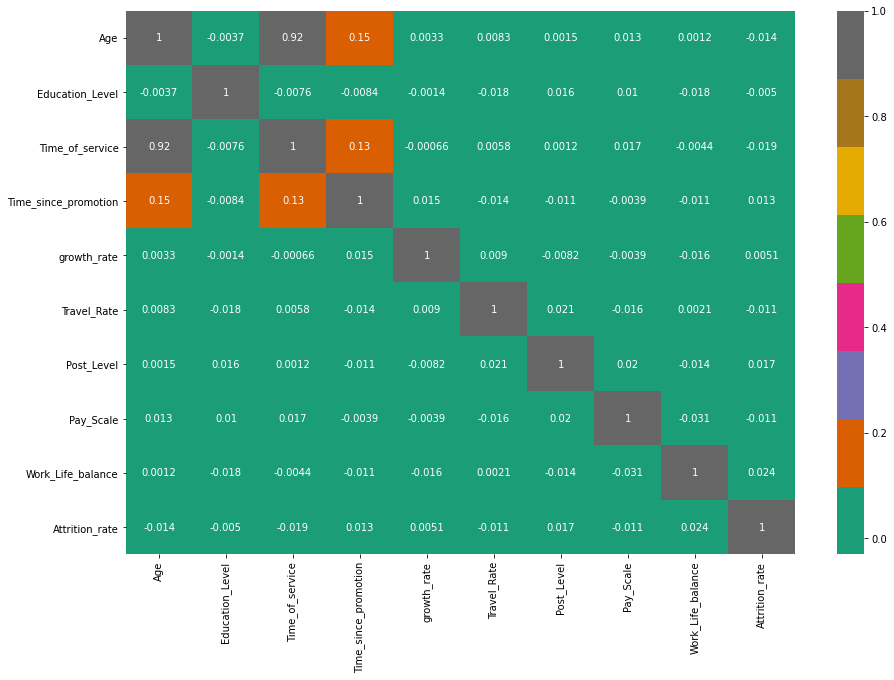

In [11]:
#categorics variables
cat_feat = [x for x in data.columns if data[x].dtype==object]

#cnumeric variables
num_feat = [x for x in data.columns if data[x].dtype!=object]


#CORRELATIONSHIP BETWEEN CONTINUOS VARIABLES
plt.figure(figsize=(15,10))
#sns.set_theme(style="darkgrid")
sns.heatmap(data[num_feat].corr(),cmap='Dark2' , annot=True)
plt.show()

array([1, 3, 2, 5, 4], dtype=int64)

In [15]:
# creating a variable with normalized work_life_balance

def norm_work_life(x):
    if x == 2:
        return 'BAD'
    elif x<2:
        return 'TERRIBLE'
    elif x==3 or x==4:
        return 'GOOD'
    else:
        return 'GREAT'
data['work_life_balance_modified'] = data['Work_Life_balance'].apply(norm_work_life)

In [16]:
# creating a variable to find out if the employee has ever been promoted or not
data['PROMOTION'] = data.Time_since_promotion.apply(lambda x: 1 if x!=0 else 0)

In [17]:
# creating a variable to know if the person traveled or not
data['TRAVEL'] = data['Travel_Rate'].apply(lambda x: 'YES' if x>0 else 'NO')

In [18]:
data.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'Attrition_rate', 'work_life_balance_modified',
       'PROMOTION', 'TRAVEL'],
      dtype='object')

**H1** - 60% of men have a salary scale above 5 while only 30% of women live on the same scale - False, women with a salary above five are 11% more than men

In [1]:
h1 = data[data.Pay_Scale>5]
h1 = h1.Gender.value_counts(normalize=True)
sns.countplot('Gender',hue='Pay_Scale',data=data)
plt.text(2,500,s='% men and women with a salary scale above 5',fontsize=14)
plt.text(2,200,s=str(h1),fontsize=12)
plt.show()

NameError: name 'data' is not defined

**h2** -25% of employees have a bad or very bad balanced life - false, 52% have a bad or very bad life

Text(4, 1000, 'GOOD        0.460438\nTERRIBLE    0.291932\nBAD         0.231152\nGREAT       0.016478\nName: work_life_balance_modified, dtype: float64')

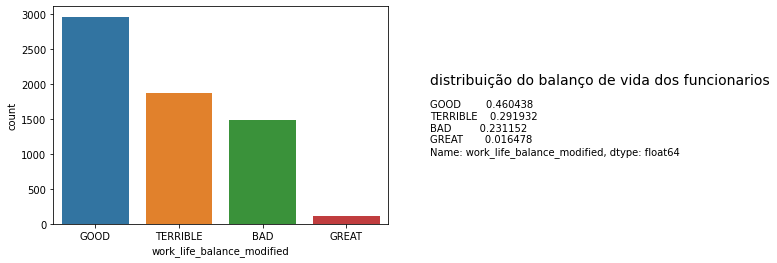

In [20]:
h2 = data.work_life_balance_modified.value_counts(normalize=True)
sns.countplot('work_life_balance_modified',data=data)
plt.text(4,2000,s='distribution of staff life balance',fontsize=14)
plt.text(4,1000,s=str(h2))

**h3** - over 50% of employees with a salary above 6 have Decision_skill_possess as Analytical - False, only 26% of employees with the Analytical skill receive a salary above 6

Text(4, 100, 'Analytical    0.257456\nBehavioral    0.250283\nDirective     0.246886\nConceptual    0.245376\nName: Decision_skill_possess, dtype: float64')

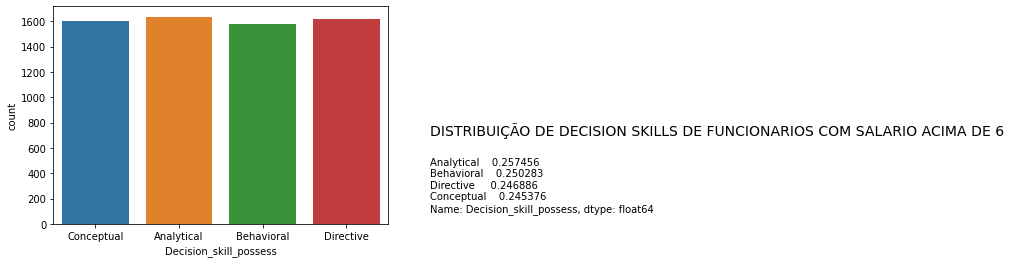

In [21]:
h3 = data[data.Pay_Scale>6]
h3 = h3.Decision_skill_possess.value_counts(normalize=True)
sns.countplot('Decision_skill_possess' , data=data)

plt.text(4,700,s='DISTRIBUTION OF DECISION SKILLS OF EMPLOYEES WITH SALARY OVER 6',fontsize=14)
plt.text(4,100,s=str(h3))

**h4** - less than 20% of employees with an educational level equal to 1 have a position with level 5 - true, ONLY 0.07% of employees with an educational level of 1 manage to reach the highest position in the company

Text(5, 200, '3    0.375394\n2    0.268139\n1    0.151420\n4    0.130915\n5    0.074132\nName: Post_Level, dtype: float64')

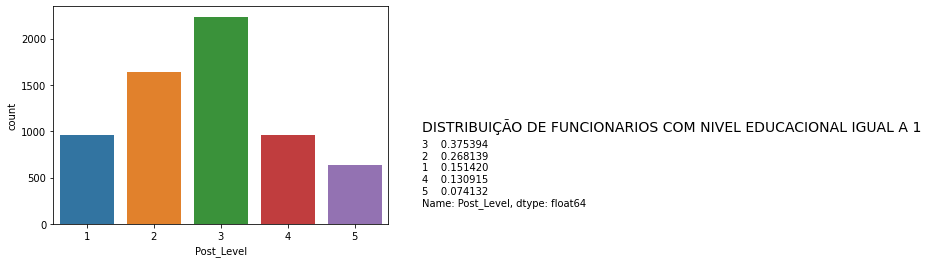

In [22]:
h4 = data[data.Education_Level==1]
h4 = h4.Post_Level.value_counts(normalize=True)
sns.countplot('Post_Level',data=data)

plt.text(5,1000,s='DISTRIBUTION OF EMPLOYEES WITH EDUCATIONAL LEVEL EQUAL TO 1',fontsize=14)
plt.text(5,200,s=str(h4))

**h5** - 15% of employees has an exit rate of at least 80% - false, 22% has an exit rate greater than or equal to 80

In [23]:
h5 = data[data.Attrition_rate >=0.250346]
print(len(h5)*100/len(data))

22.260220736825744


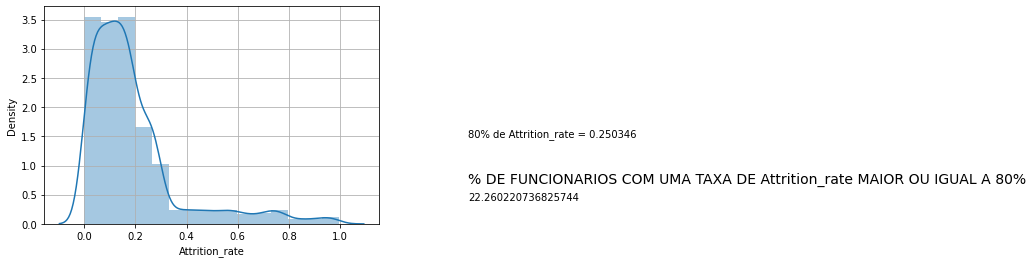

In [24]:
sns.distplot(data.Attrition_rate,bins=15)
plt.grid()
plt.text(1.5,1.5,s='80% de Attrition_rate = 0.250346')
plt.text(1.5,0.7,s='% OF EMPLOYEES WITH A Attribution Rate RATE GREATER OR EQUAL TO 80%',fontsize=14)
plt.text(1.5,0.4,s=str(len(h5)*100/len(data)))
plt.show()

In [25]:
data.Hometown.value_counts(normalize=True)

Lebanon        0.296596
Springfield    0.248718
Franklin       0.216073
Washington     0.158402
Clinton        0.080211
Name: Hometown, dtype: float64

In [26]:
data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate,work_life_balance_modified,PROMOTION,TRAVEL
0,EID_23371,F,42,4,Married,Franklin,IT,Conceptual,4,4,33,1,1,7.0,type2,3.0,0.1841,GOOD,1,YES
1,EID_18000,M,24,3,Single,Springfield,Logistics,Analytical,5,4,36,0,3,6.0,type2,4.0,0.0670,GOOD,1,NO
2,EID_3891,F,58,3,Married,Clinton,Quality,Conceptual,27,3,51,0,2,8.0,type2,1.0,0.0851,TERRIBLE,1,NO
3,EID_17492,F,26,3,Single,Lebanon,Human Resource Management,Behavioral,4,3,56,1,3,8.0,type2,1.0,0.0668,TERRIBLE,1,YES
4,EID_22534,F,31,1,Married,Springfield,Logistics,Conceptual,5,4,62,1,3,2.0,type3,3.0,0.1827,GOOD,1,YES


**H6** -- 30% employees are in the logistics unit - false, 16% only

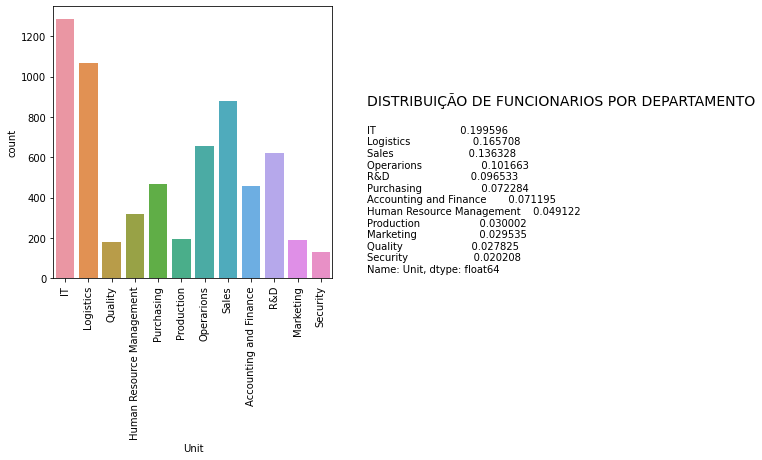

In [27]:
h6 = data.Unit.value_counts(normalize=True)
plt.figure(figsize=(5,5))
sns.countplot('Unit',data=data)
plt.xticks(rotation=90)

plt.text(13,860,s='DISTRIBUTION OF EMPLOYEES BY DEPARTMENT',fontsize=14)
plt.text(13,30,s=str(h6))
plt.show()

**H7** -- 20% of employees have at least 10 years of company -false, 52% of employees have 10 or more years of company

Text(55, 0.04, '52.044147365148454')

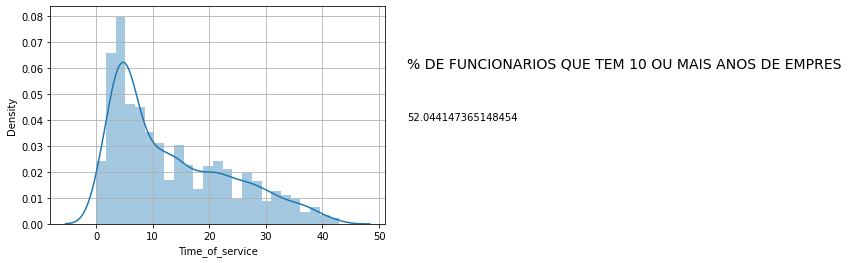

In [28]:
h7 = data[data.Time_of_service >=10]
len(h7)*100/len(data)

sns.distplot(data.Time_of_service)
plt.grid()
plt.text(55,0.06,s='% OF EMPLOYEES WHO HAVE 10 OR MORE YEARS OF BUSINESS',fontsize=14)
plt.text(55,0.04,s=str(len(h7)*100/len(data)))

**H8** -- 25% of employees who have been with the company for more than 8 years manage to reach job level 4 - false, only 8% manage

Text(55, 0.04, '8.37867247007617')

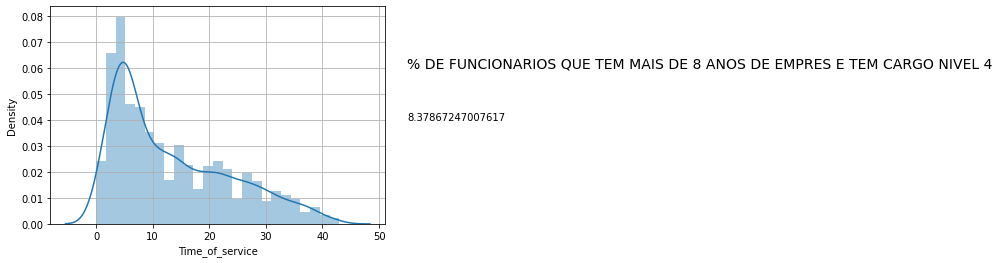

In [29]:
h8 = data[(data.Time_of_service >8) & (data.Post_Level==4)]
len(h8)*100/len(data)

sns.distplot(data.Time_of_service)
plt.grid()
plt.text(55,0.06,s='% OF EMPLOYEES WHO HAVE MORE THAN 8 YEARS OF BUSINESS AND HAVE LEVEL POSITION 4',fontsize=14)
plt.text(55,0.04,s=str(len(h8)*100/len(data)))

**H9** -- 40% employees who have a bad or bad work-life balance never received a promotion -

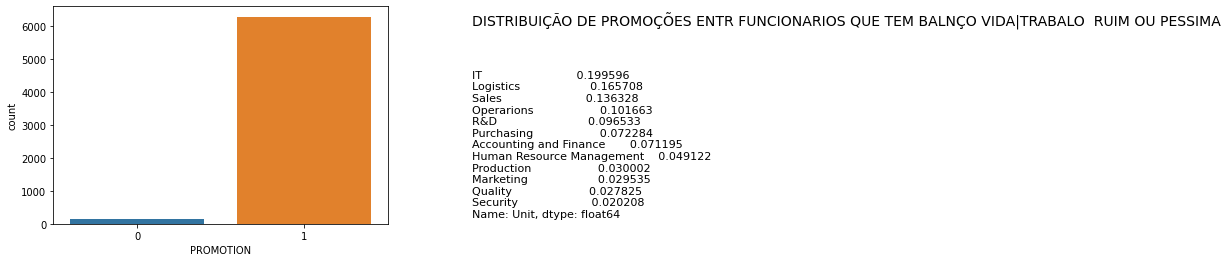

In [30]:
h9 = data[(data.work_life_balance_modified=='TERRIBLE') | (data.work_life_balance_modified=='BAD')]
h9 = h9.PROMOTION.value_counts(normalize=True)

sns.countplot('PROMOTION',data=data)
plt.text(2,6000,s='DISTRIBUTION OF PROMOTIONS ENTR EMPLOYEES WHO HAVE LIFE BALANCE | BAD OR BAD WORK',fontsize=14)
plt.text(2,200,s=str(h6),fontsize=11.10)
plt.show()

**H10** --IT department has 50% of its employees receiving over 6 on the payment scale - false, only 7% of IT employees receiving over 6 on the payment scale

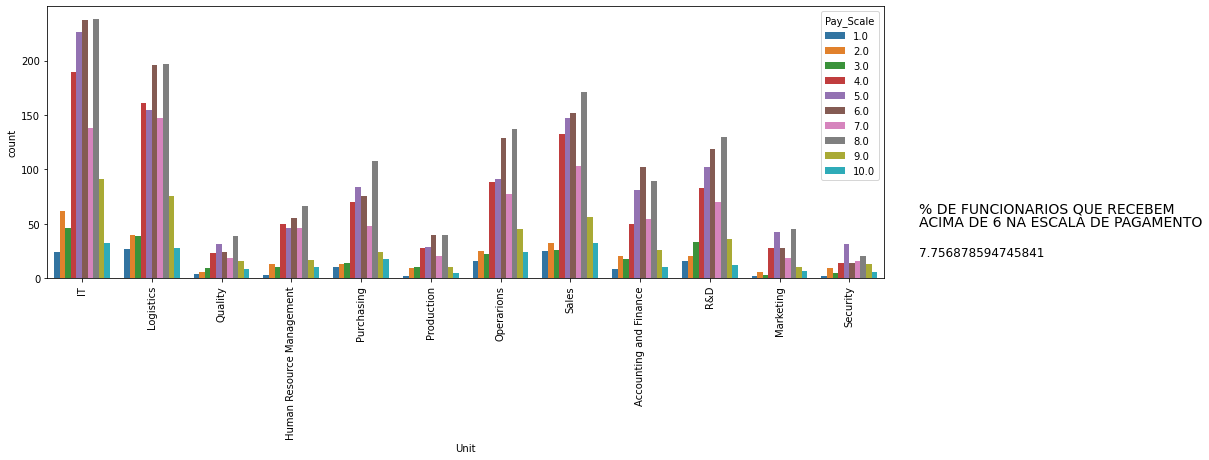

In [31]:
h10 = data[(data.Unit=='IT') & (data.Pay_Scale>6)]
len(h10)*100/len(data.Unit=='IT')

plt.figure(figsize=(15,5))
sns.countplot('Unit',hue='Pay_Scale',data=data)

plt.text(12,60,s='%OF EMPLOYEES WHO RECEIVE',FONTSIZE=14)
plt.text(12,48,s='ABOVE 6 ON THE PAYMENT SCALE',FONTSIZE=14)
plt.text(12,20,s=str(len(h10)*100/len(data.Unit=='IT')),FONTSIZE=12)
plt.xticks(rotation=90)
plt.show()